In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from micrograd.engine import Value


In [10]:
a = Value(2.0)
b = Value(4.0)
c = a / b
c.backward()

In [11]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(node):
        if node in nodes:
            return
        nodes.add(node)
        for parent in node._parents:
            edges.add((parent, node))
            build(parent)

    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))
        # for every value, created a rentangle (record) node
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (node.label, node.data, node.grad,),  shape='record')
        if node._op:
            dot.node(name=uid + node._op, label = node._op)
            dot.edge(uid + node._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot




In [12]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
sum_xiwi = x1w1 + x2w2; sum_xiwi.label = 'sum_xiwi'
n = sum_xiwi + b; n.label = 'n'
# ---
# o = n.tanh(); 
# alternate tanh implementation
e = (2*n).exp(); e.label = 'e^2n'
o = (e - 1) / (e + 1)
# ---
o.label = 'o'
o.backward()


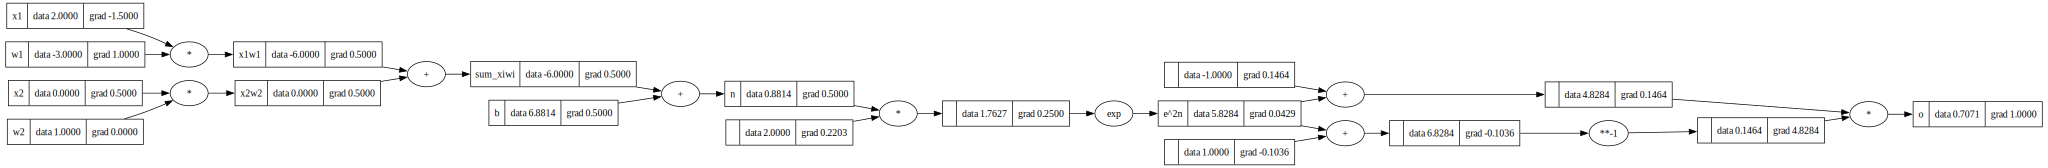

In [13]:
draw_dot(o)

In [14]:
# pytorch equivalent
import torch

x1 = torch.Tensor([2.0]).double()                   ;x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                   ;x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()                  ;w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                   ;w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()     ;b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [15]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
    
]
ys = [1.0, -1.0, -1.0, 1.0]

In [16]:
from micrograd.nn import MLP

nn = MLP(3, [4, 4, 1])

def predict(nn, xs):
    ypred = [nn(x) for x in xs] # forward pass
    loss = sum((yi - ypi)**2 for yi, ypi in zip(ys, ypred))
    return ypred, loss


for i in range(200):
    ypred, loss = predict(nn, xs)
    if loss.data < 0.01:
        break
    print(f'iteration={i} loss={loss}')
    # zero_grad()
    for p in nn.parameters():
        p.grad = 0
    loss.backward()
    # gradient descent
    for p in nn.parameters():
        p.data -= 0.01 * p.grad

print('--- END gradient descent ---')

    
print(predict(nn, xs))

iteration=0 loss=Value(=4.453231774384757, 0)
iteration=1 loss=Value(=4.180009237222526, 0)
iteration=2 loss=Value(=3.9383851070257263, 0)
iteration=3 loss=Value(=3.7263206089133543, 0)
iteration=4 loss=Value(=3.5383033149617757, 0)
iteration=5 loss=Value(=3.3682524433700065, 0)
iteration=6 loss=Value(=3.2110594737771674, 0)
iteration=7 loss=Value(=3.0629739344721947, 0)
iteration=8 loss=Value(=2.9214147556861363, 0)
iteration=9 loss=Value(=2.7846295951911184, 0)
iteration=10 loss=Value(=2.6514009326253842, 0)
iteration=11 loss=Value(=2.520855056974068, 0)
iteration=12 loss=Value(=2.3923652431603637, 0)
iteration=13 loss=Value(=2.2655205152540723, 0)
iteration=14 loss=Value(=2.1401302770419575, 0)
iteration=15 loss=Value(=2.0162391298618108, 0)
iteration=16 loss=Value(=1.8941312124541532, 0)
iteration=17 loss=Value(=1.7743098098496155, 0)
iteration=18 loss=Value(=1.6574467752194872, 0)
iteration=19 loss=Value(=1.5443066051876557, 0)
iteration=20 loss=Value(=1.4356587186152718, 0)
itera